# Autoencoder trained in tag 2 version 3
John Ignacio R.M. 2020-06-17

This time a new model is going to be trained, one that does not overfit and obtains better evaluation metrics.

In [1]:
#ada
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import get_trainvaltest_from_csv, KerasModel

#libs
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import adam

Welcome to JupyROOT 6.20/04
Using TensorFlow backend.


In [2]:
data_path = "../processed_data"
signal = "Xtohh2000"
seed = 420

In [3]:
sets = get_trainvaltest_from_csv(data_path, signal, .6, .2, .2, seed, region = "SR", tag = 2)
x_train, x_val, x_test = sets["x"].values()
y_train, y_val, y_test = sets["y"].values()
w_train, w_val, w_test = sets["w"].values()
print(x_train.shape, x_val.shape, x_test.shape)

(5241, 14) (1748, 14) (1748, 14)


In [4]:
#dividing the classes
x_train_0 = x_train[y_train == 0]
x_train_1 = x_train[y_train == 1]
w_train_0 = w_train[(y_train == 0).ravel()]
w_train_1 = w_train[(y_train == 1).ravel()]

x_val_0 = x_val[y_val == 0]
x_val_1 = x_val[y_val == 1]
w_val_0 = w_val[(y_val == 0).ravel()]
w_val_1 = w_val[(y_val == 1).ravel()]

x_test_0 = x_test[y_test == 0]
x_test_1 = x_test[y_test == 1]
w_test_0 = w_test[(y_test == 0).ravel()]
w_test_1 = w_test[(y_test == 1).ravel()]

print(x_train_1.shape, x_val_1.shape, x_test_1.shape)

(5138, 14) (1702, 14) (1720, 14)


## A5: The Best One Here

In [11]:
class KerasAutoencoder5(KerasModel):

    def __init__(self, n_features):
        input_layer = Input(shape=(n_features, ))
        encoder_1 = Dense(8, kernel_initializer='he_uniform',activation='relu')(input_layer)
        drop_1 = Dropout(rate=0.2)(encoder_1)
        encoder_2 = Dense(2, kernel_initializer='he_uniform',activation='relu')(drop_1)
        drop_2 = Dropout(rate=0.2)(encoder_2)
        decoder_2 = Dense(8, kernel_initializer='he_uniform',activation='relu')(drop_2)#drop_4)
        drop_5 = Dropout(rate=0.1)(decoder_2)
        output_layer = Dense(n_features, activation="sigmoid")(drop_5)
        self.model = Model(inputs=input_layer, outputs=output_layer)

        #compile
        self.model.compile(loss='mean_squared_error', optimizer=adam(lr=0.01), metrics = ["acc"])

        #title
        self.title = 'optimizer: adam , lr = 0.01, loss = mean squared error'

        #training
        self.history = None

        #name
        self.model_name = "KA5"

In [12]:
a5 = KerasAutoencoder5(x_train_1.shape[1])
a5.fit(x_train_1, x_train_1, w_train_1, x_val_1, x_val_1, w_val_1, 150)

=] - 1s 151us/step - loss: 9.7009e-04 - acc: 0.2211 - val_loss: 9.3193e-04 - val_acc: 0.2897
Epoch 15/150
5138/5138 [==============================] - 1s 149us/step - loss: 9.6352e-04 - acc: 0.2367 - val_loss: 9.3227e-04 - val_acc: 0.2967
Epoch 16/150
5138/5138 [==============================] - 1s 159us/step - loss: 9.6712e-04 - acc: 0.2155 - val_loss: 9.3096e-04 - val_acc: 0.2902
Epoch 17/150
5138/5138 [==============================] - 1s 160us/step - loss: 9.7051e-04 - acc: 0.2221 - val_loss: 9.3846e-04 - val_acc: 0.2826
Epoch 18/150
5138/5138 [==============================] - 1s 156us/step - loss: 9.7159e-04 - acc: 0.2406 - val_loss: 9.3328e-04 - val_acc: 0.2861
Epoch 19/150
5138/5138 [==============================] - 1s 162us/step - loss: 9.6932e-04 - acc: 0.2357 - val_loss: 9.3590e-04 - val_acc: 0.2926
Epoch 20/150
5138/5138 [==============================] - 1s 153us/step - loss: 9.6938e-04 - acc: 0.2320 - val_loss: 9.3389e-04 - val_acc: 0.2996
Epoch 21/150
5138/5138 [=======

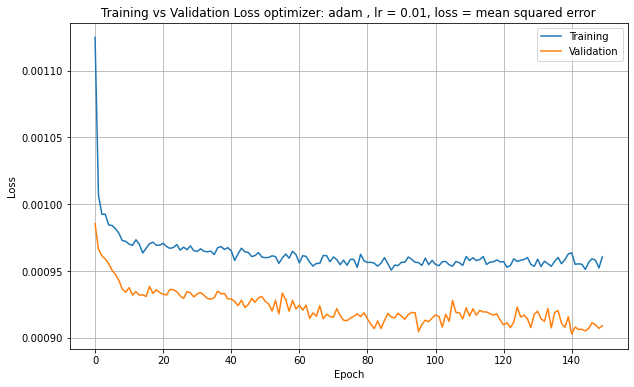

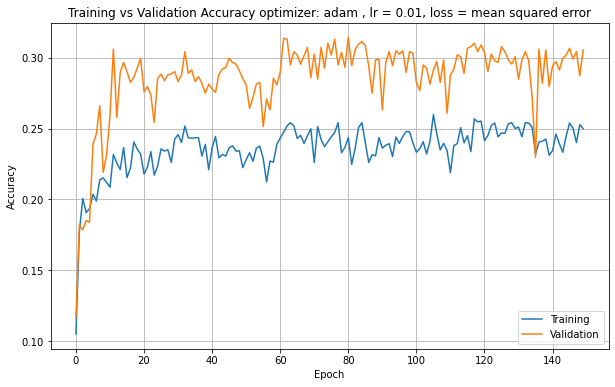

1720/1720 [==============================] - 0s 30us/step


[0.8191281606984693, 0.3279069662094116]

In [13]:
a5.plot_loss()
a5.plot_acc()
a5.model.evaluate(x_test_1, x_test_1, batch_size=128)

In [14]:
a5.save(data_path, "2020-06-17")

modelo
modelo
historia
mas historia


## A6

In [15]:
class KerasAutoencoder6(KerasModel):

    def __init__(self, n_features):
        input_layer = Input(shape=(n_features, ))
        encoder_1 = Dense(8, kernel_initializer='he_uniform',activation='softplus')(input_layer)
        drop_1 = Dropout(rate=0.2)(encoder_1)
        encoder_2 = Dense(2, kernel_initializer='he_uniform',activation='softplus')(drop_1)
        drop_2 = Dropout(rate=0.2)(encoder_2)
        decoder_2 = Dense(8, kernel_initializer='he_uniform',activation='softplus')(drop_2)#drop_4)
        drop_5 = Dropout(rate=0.1)(decoder_2)
        output_layer = Dense(n_features, activation="sigmoid")(drop_5)
        self.model = Model(inputs=input_layer, outputs=output_layer)

        #compile
        self.model.compile(loss='mean_squared_error', optimizer=adam(lr=0.01), metrics = ["acc"])

        #title
        self.title = 'optimizer: adam , lr = 0.01, loss = mean squared error'

        #training
        self.history = None

        #name
        self.model_name = "KA6"

In [16]:
a6 = KerasAutoencoder6(x_train_1.shape[1])
a6.fit(x_train_1, x_train_1, w_train_1, x_val_1, x_val_1, w_val_1, 150)

=] - 1s 148us/step - loss: 9.7779e-04 - acc: 0.2608 - val_loss: 9.6975e-04 - val_acc: 0.2603
Epoch 15/150
5138/5138 [==============================] - 1s 147us/step - loss: 9.8026e-04 - acc: 0.2659 - val_loss: 9.7003e-04 - val_acc: 0.1851
Epoch 16/150
5138/5138 [==============================] - 1s 148us/step - loss: 9.7642e-04 - acc: 0.2577 - val_loss: 9.7057e-04 - val_acc: 0.2626
Epoch 17/150
5138/5138 [==============================] - 1s 142us/step - loss: 9.7797e-04 - acc: 0.2705 - val_loss: 9.7128e-04 - val_acc: 0.2180
Epoch 18/150
5138/5138 [==============================] - 1s 144us/step - loss: 9.7772e-04 - acc: 0.2805 - val_loss: 9.6958e-04 - val_acc: 0.2644
Epoch 19/150
5138/5138 [==============================] - 1s 165us/step - loss: 9.7592e-04 - acc: 0.2801 - val_loss: 9.7169e-04 - val_acc: 0.2650
Epoch 20/150
5138/5138 [==============================] - 1s 169us/step - loss: 9.7333e-04 - acc: 0.2715 - val_loss: 9.6252e-04 - val_acc: 0.2656
Epoch 21/150
5138/5138 [=======

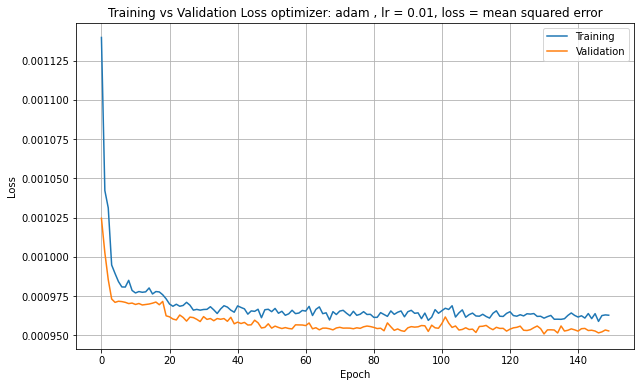

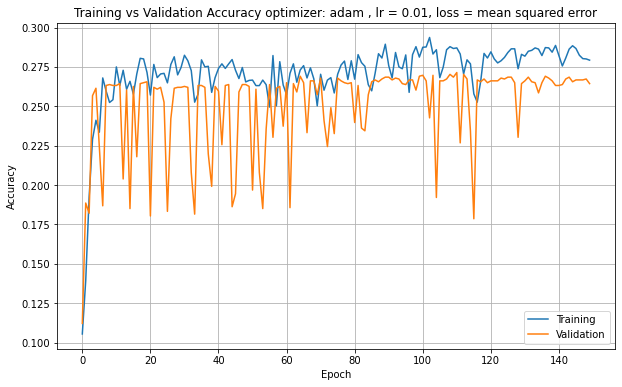

1720/1720 [==============================] - 0s 25us/step


[0.8587900458380233, 0.28953489661216736]

In [17]:
a6.plot_loss()
a6.plot_acc()
a6.model.evaluate(x_test_1, x_test_1, batch_size=128)